In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataset.Fetus import FetusDataset
from dataset.Fetus_transform import Fetus_transformDataset
from dataset.Fetus import FetusDataset
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

In [2]:
num_epoch=120
batch_size={'train':2,
            'val':1
            }
train_path='E:/Idm_Downloads/Compressed/Data/data/train'
val_path= 'E:/Idm_Downloads/Compressed/Data/data/test'
#变换
x_transforms = transforms.Compose([
    transforms.Resize((512,512)),
    # transforms.CenterCrop(512),
    transforms.ToTensor()
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
# mask只需要转换为tensor
y_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    # transforms.CenterCrop(512),
    transforms.ToTensor()
   ])
#加载数据集
train_dataset=Fetus_transformDataset(train_path)
val_dataset=Fetus_transformDataset(val_path)
#设置dataloader
dataloaders={
    'train':DataLoader(train_dataset,batch_size=batch_size['train'],shuffle=True,num_workers=0),
    'val':DataLoader(val_dataset,batch_size=batch_size['val'],shuffle=True,num_workers=0)
             }

In [4]:
import matplotlib.pyplot as plt
img,label=next(iter(dataloaders['train']))
print(img.dtype)
print(label.dtype)
print(img.shape)
print(label.shape)
img1,img2=img
lable1,label2=label
plt.figure()
plt.subplot(121)
plt.imshow(img1.transpose(0,2))
plt.subplot(122)
plt.imshow(lable1.transpose(0,2))
plt.show()

ValueError: operands could not be broadcast together with shapes (512,512,4) (3,) (512,512,4) 

In [82]:
num_epoch=120
batch_size={'train':2,
            'val':1
            }
train_path='E:/Idm_Downloads/Compressed/Data/data/train'
val_path= 'E:/Idm_Downloads/Compressed/Data/data/test'
#变换
x_transforms = transforms.Compose([
    transforms.Resize((512,512)),
    # transforms.CenterCrop(512),
    transforms.ToTensor()
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
# mask只需要转换为tensor
y_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    # transforms.CenterCrop(512),
    transforms.ToTensor()
   ])
#加载数据集
train_dataset=FetusDataset(train_path,transform=x_transforms,target_transform=y_transforms)
val_dataset=FetusDataset(val_path,transform=x_transforms,target_transform=y_transforms)
#设置dataloader
dataloaders={
    'train':DataLoader(train_dataset,batch_size=batch_size['train'],shuffle=True,num_workers=0),
    'val':DataLoader(val_dataset,batch_size=batch_size['val'],shuffle=True,num_workers=0)
             }

torch.Size([2, 3, 512, 512])
torch.Size([2, 1, 512, 512])
torch.float32
torch.float32


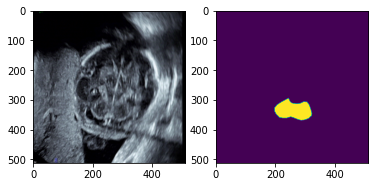

In [84]:
import matplotlib.pyplot as plt
img,label,_=next(iter(dataloaders['train']))
print(img.shape)
print(label.shape)
print(img.dtype)
print(label.dtype)
img1,img2=img
label1,label2=label
plt.figure()
plt.subplot(121)
plt.imshow(img1.transpose(0,2))
plt.subplot(122)
plt.imshow(label1.transpose(0,2))
plt.show()